In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import os

In [35]:
def get_file_size(path):
    return os.path.getsize(path) / (1024.0)

In [48]:
def compress_image(image_path, quality=50):
    # Read the grayscale image
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded successfully
    if original_image is None:
        print("Error: Image not loaded.")
        return

    # Get the size of the original image
    original_size = get_file_size(image_path)

    # Apply DCT to the grayscale image
    dct_image = cv2.dct(np.float32(original_image))

    # Set the quality factor for compression (0-100, higher means better quality)
    quality_factor = quality

    # Scale the DCT coefficients
    dct_image *= quality_factor / 100.0

    # Apply inverse DCT to the compressed image
    compressed_image = np.uint8(cv2.idct(dct_image))

    # Get the size of the original image
    original_size = get_file_size(image_path)

    # Save the compressed image with explicit compression settings
    compressed_path = f"compressed_grayscale_image_quality_{quality}.jpg"
    cv2.imwrite(compressed_path, compressed_image, [int(cv2.IMWRITE_JPEG_QUALITY), quality])

    # Get the size of the compressed image
    compressed_size = get_file_size(compressed_path)

    # Display the original and compressed images
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title(f"Compressed Grayscale Image (Quality = {quality})")
    plt.imshow(compressed_image, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Size Comparison")
    plt.bar(['Original', 'Compressed'], [original_size, compressed_size], color=['blue', 'orange'])
    plt.ylabel("Size (KB)")

    plt.show()


In [49]:
image_path = "./images/rnm.jpg"

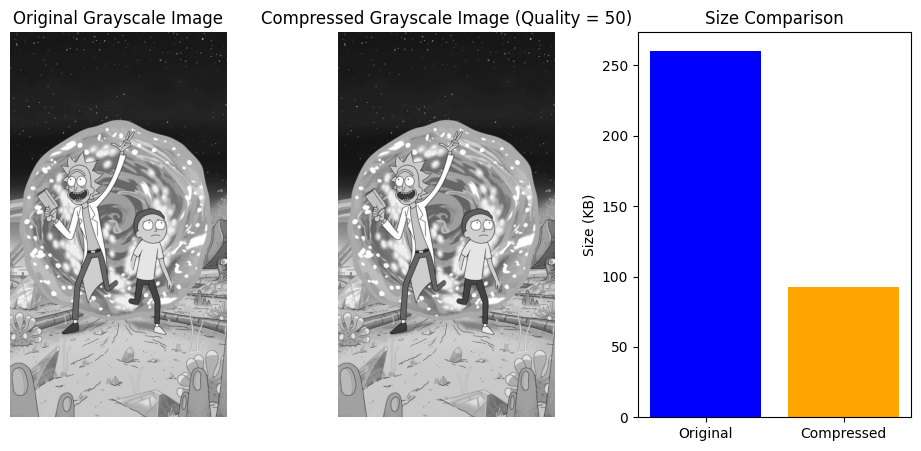

In [50]:
compress_image(image_path, quality=50)